# German Credit - full robustness evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings. filterwarnings('ignore')

## Horizontal subset attack

In [3]:
# load results of the analyses: evaluation/robustness/horizontal/german_credit
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [4]:
results_horizontal.head(10)

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.0,1.0,0.0,0.00,NaN,1.0
1,128.0,1.0,1.0,0.9,1.00,NaN,1.0
2,128.0,1.0,1.0,0.8,1.00,NaN,1.0
3,128.0,1.0,1.0,0.7,1.00,NaN,1.0
4,128.0,1.0,1.0,0.6,1.00,NaN,1.0
5,128.0,1.0,1.0,0.5,0.93,NaN,1.0
6,128.0,1.0,1.0,0.4,0.63,NaN,1.0
7,128.0,1.0,1.0,0.3,0.43,NaN,1.0
8,128.0,1.0,1.0,0.2,0.16,NaN,1.0
9,128.0,1.0,1.0,0.1,0.05,NaN,1.0


In [5]:
# todo: fill out missing data

In [3]:
sns.set_theme()

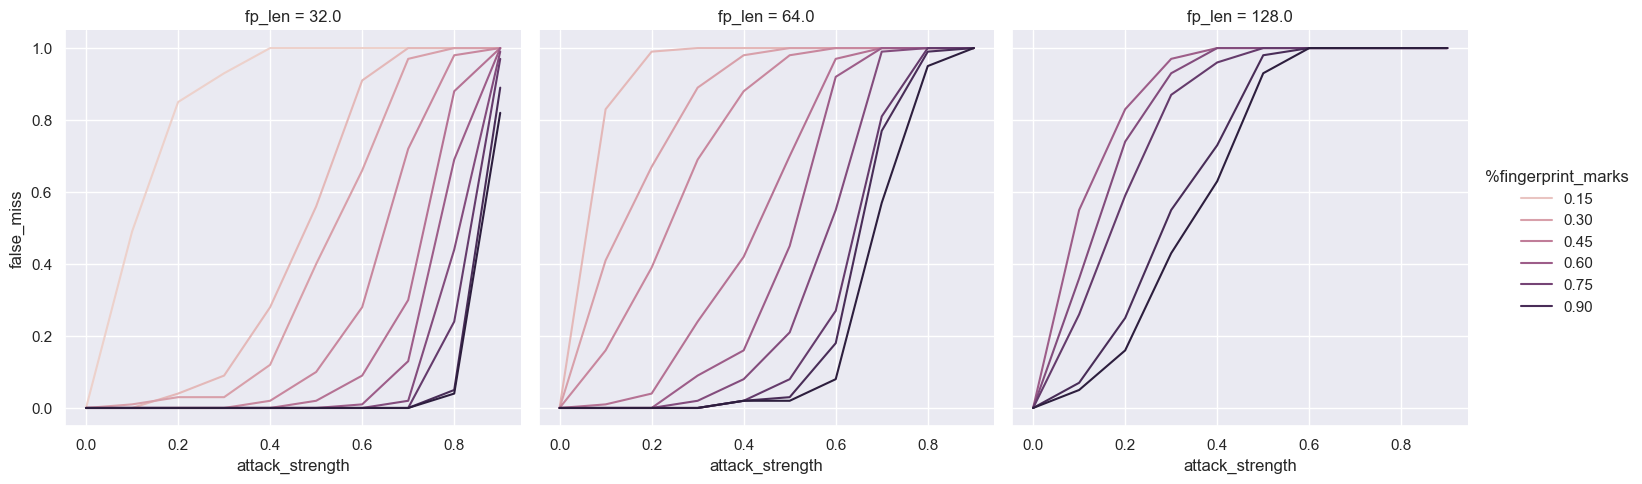

In [7]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_german_credit.svg')
plt.savefig('figures/robustness_horizontal_german_credit.png')

### Theoretical estimation

In [8]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

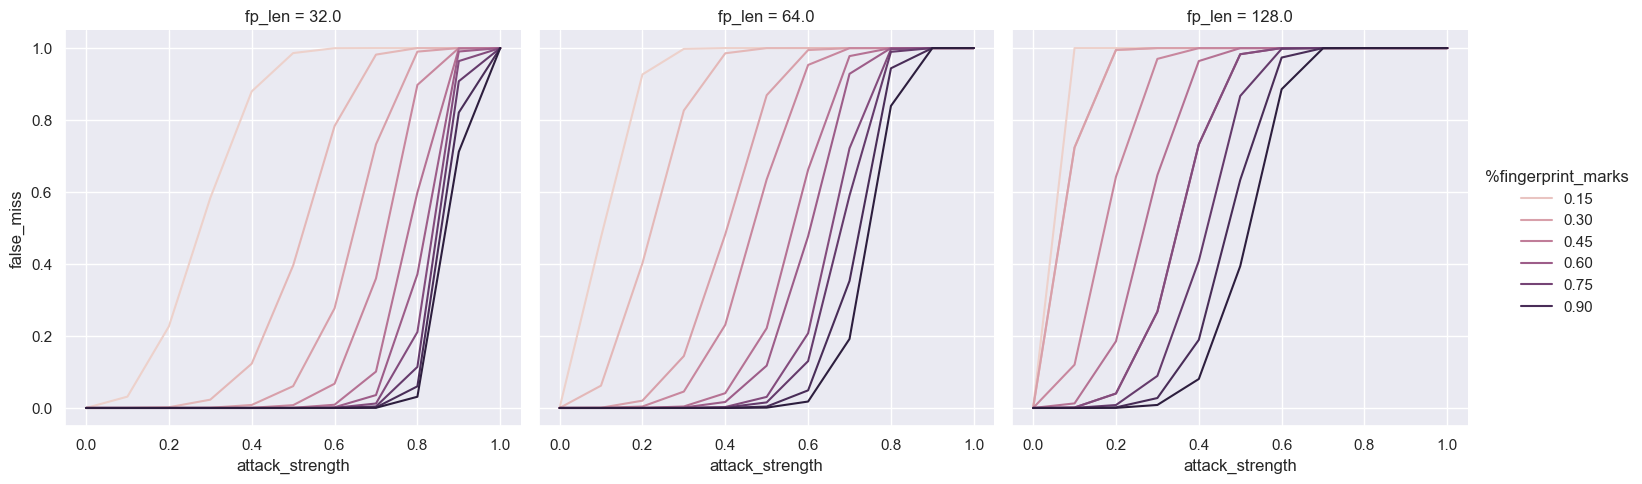

In [9]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison: empirical vs theoretical

In [10]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

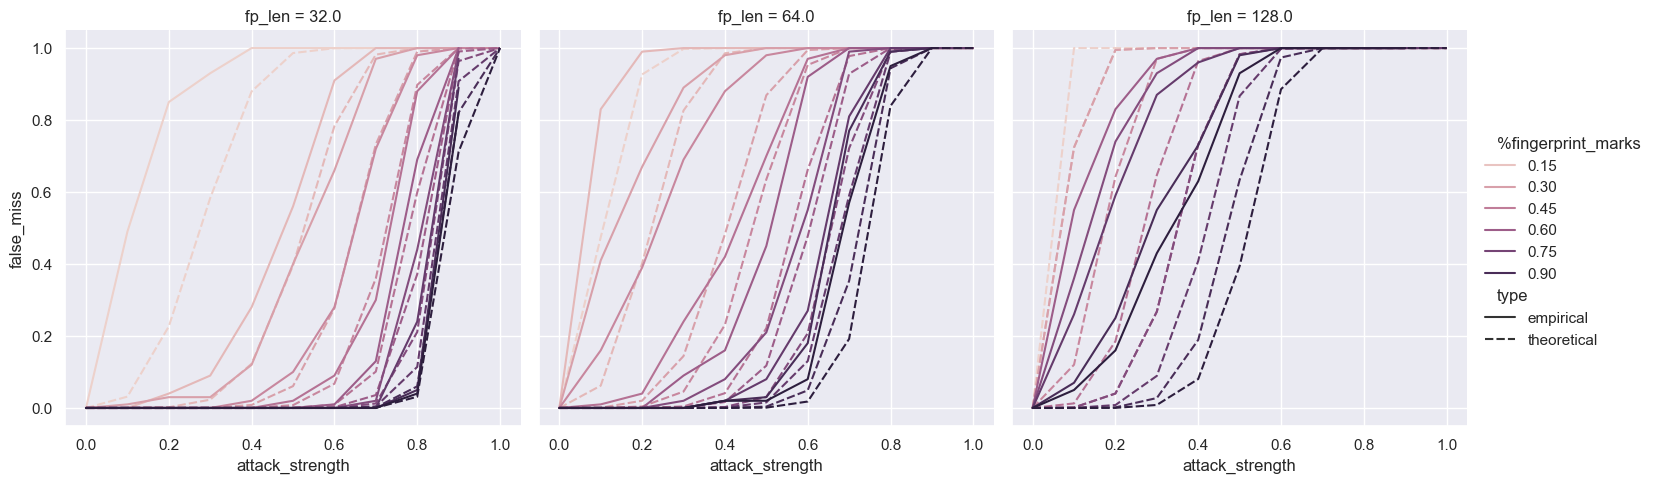

In [11]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')

plt.savefig('figures/robustness_horizontal_est_german_credit.svg')
plt.savefig('figures/robustness_horizontal_est_german_credit.png')

In [12]:
# todo: somehow represent the error (so that it somehow clearly shows that it's bigger for smaller datasets, especially when we 
# choose the bigger fp len). and maybe also show the actual distribution of the fingerprint bits(histogram of counts)

## Vertical subset attack

In [31]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength_abs': float(key),
                                                    'attack_strength': float(key)/20.0,
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

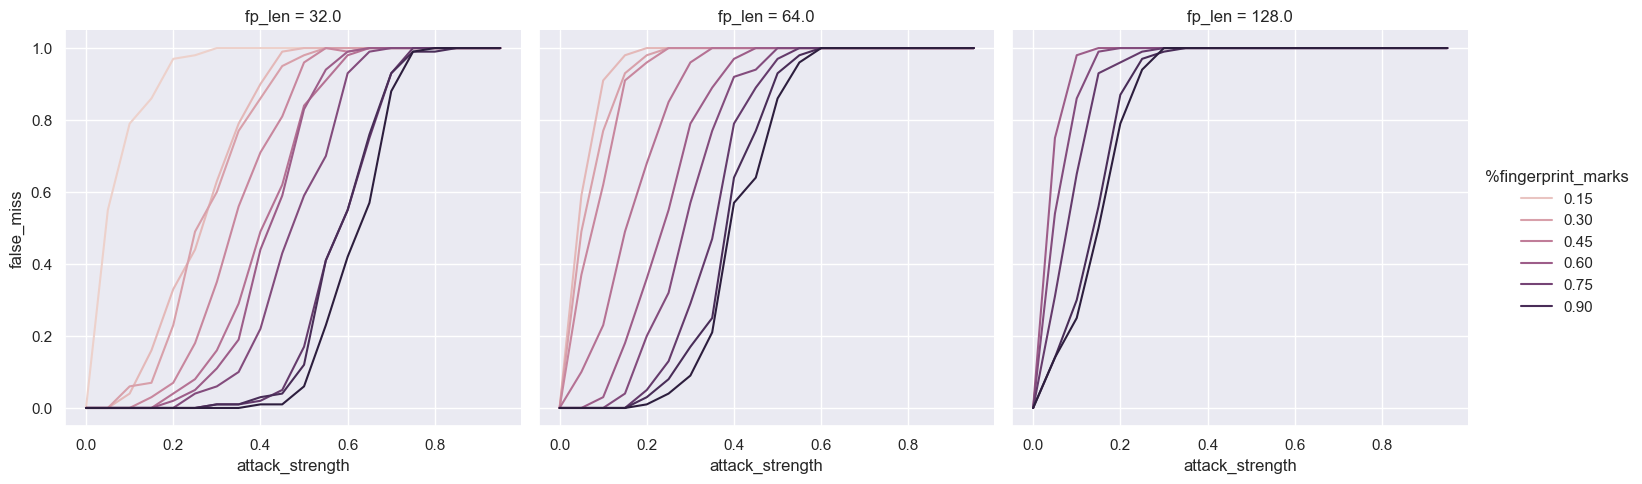

In [32]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_german_credit.svg')
plt.savefig('figures/robustness_vertical_german_credit.png')

### Theoretical estimation

In [33]:
results_vertical_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical_est/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical_est/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical_est = results_vertical_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

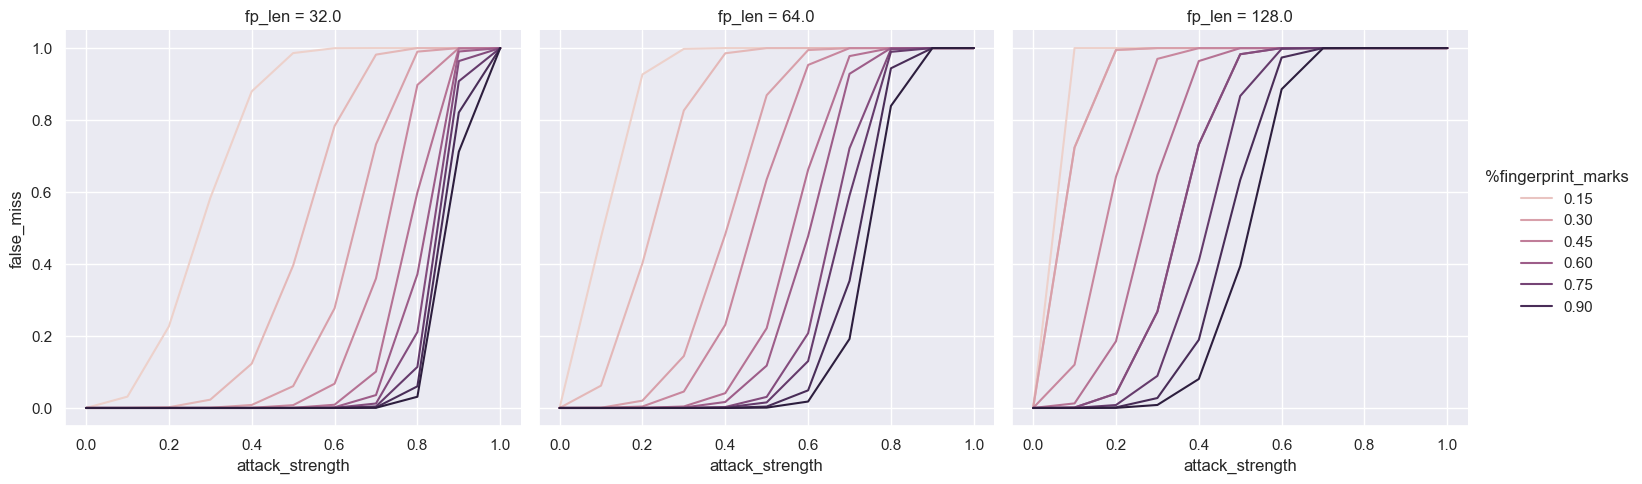

In [34]:
sns.relplot(data=results_vertical_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison emphirical vs theoretical

In [35]:
results_vertical['type'] = ['empirical' for i in range(len(results_vertical))]
results_vertical_est['type'] = ['theoretical' for i in range(len(results_vertical_est))]

results_vertical_comp = pd.concat([results_vertical, results_vertical_est])

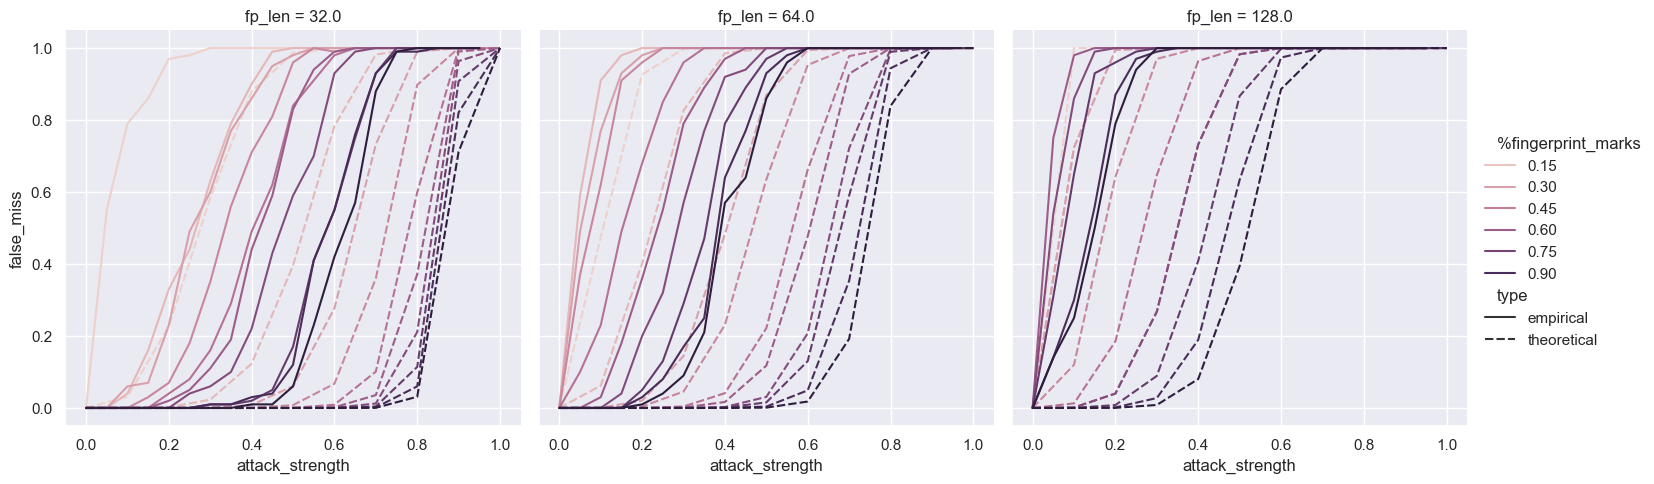

In [36]:
# plot comparison 
sns.relplot(data=results_vertical_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_vertical_est_german_credit.svg')
plt.savefig('figures/robustness_vertical_est_german_credit.png')

## Flipping attack

In [4]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_flipping = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping = results_flipping.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


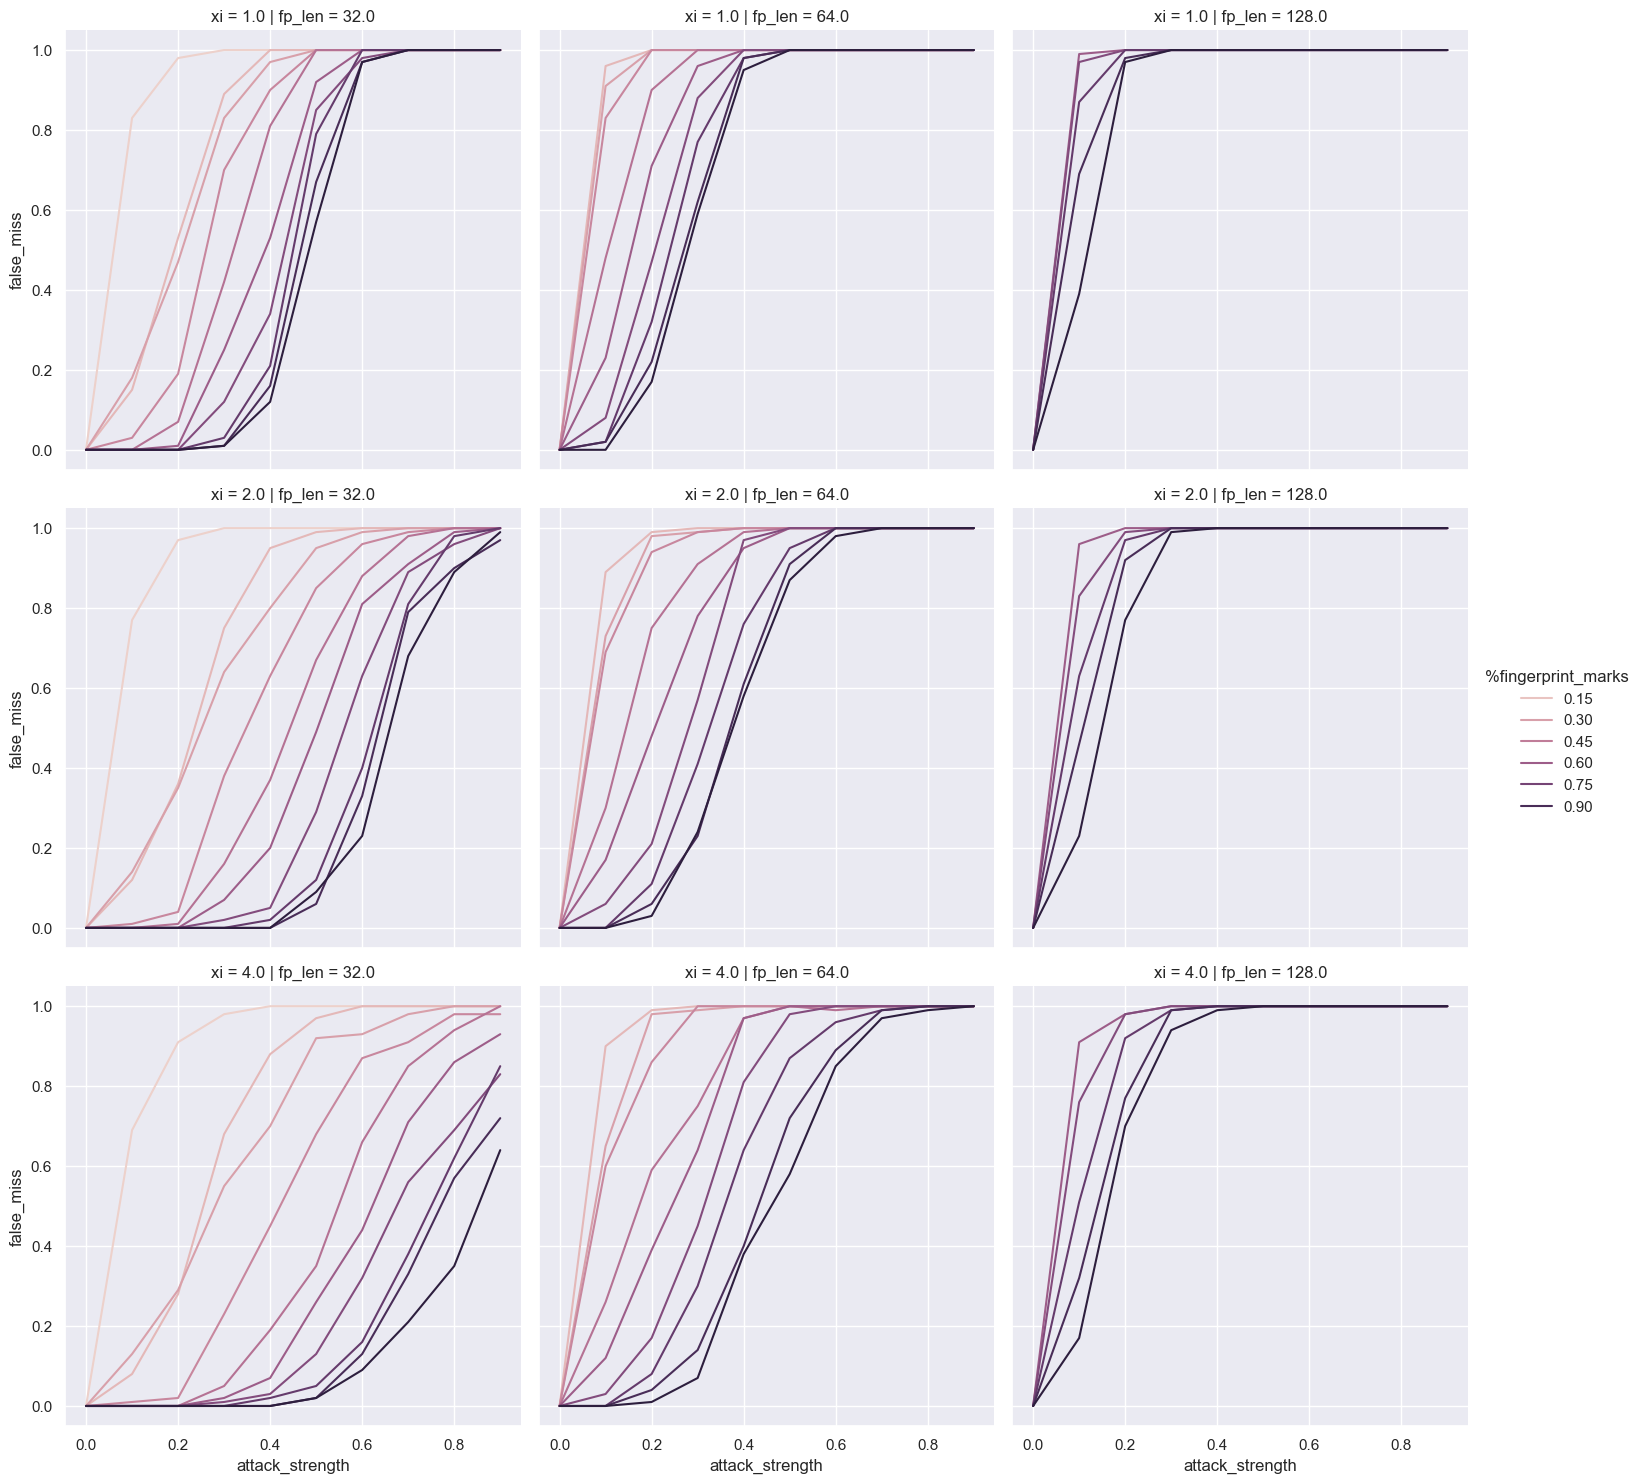

In [5]:
sns.relplot(data=results_flipping, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_flipping_german_credit.svg')
plt.savefig('figures/robustness_flipping_german_credit.png')

### Comparison with the theoretical estimate

In [6]:
results_flipping_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping_est/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping_est/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping_est = results_flipping_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [7]:
results_flipping['type'] = ['empirical' for i in range(len(results_flipping))]
results_flipping_est['type'] = ['theoretical' for i in range(len(results_flipping_est))]

results_flipping_comp = pd.concat([results_flipping, results_flipping_est])

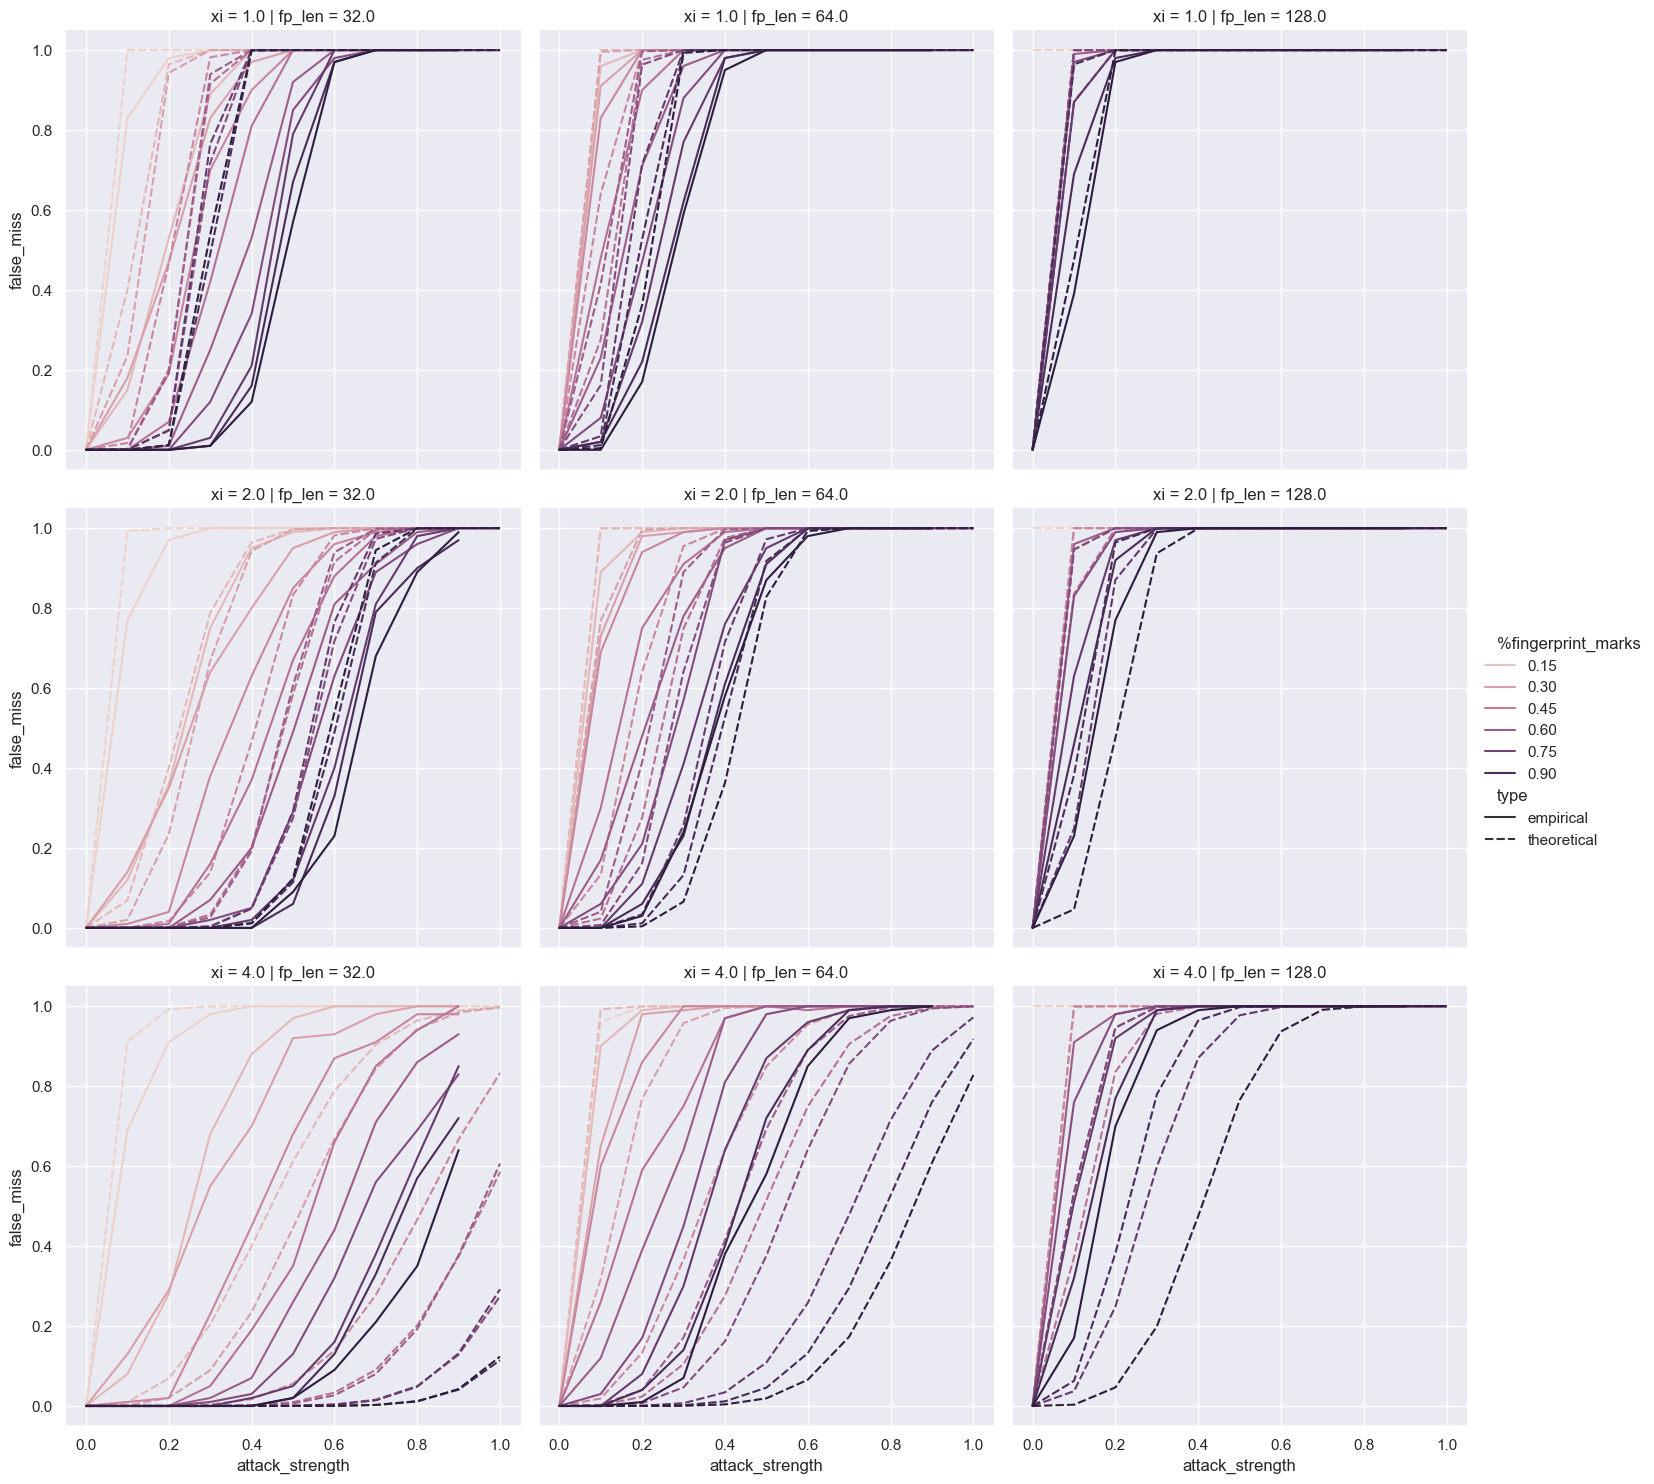

In [8]:
# plot comparison 
sns.relplot(data=results_flipping_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', row='xi', style='type')
plt.savefig('figures/robustness_flipping_est_german_credit.svg')
plt.savefig('figures/robustness_flipping_est_german_credit.png')

## Rounding attack

In [21]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


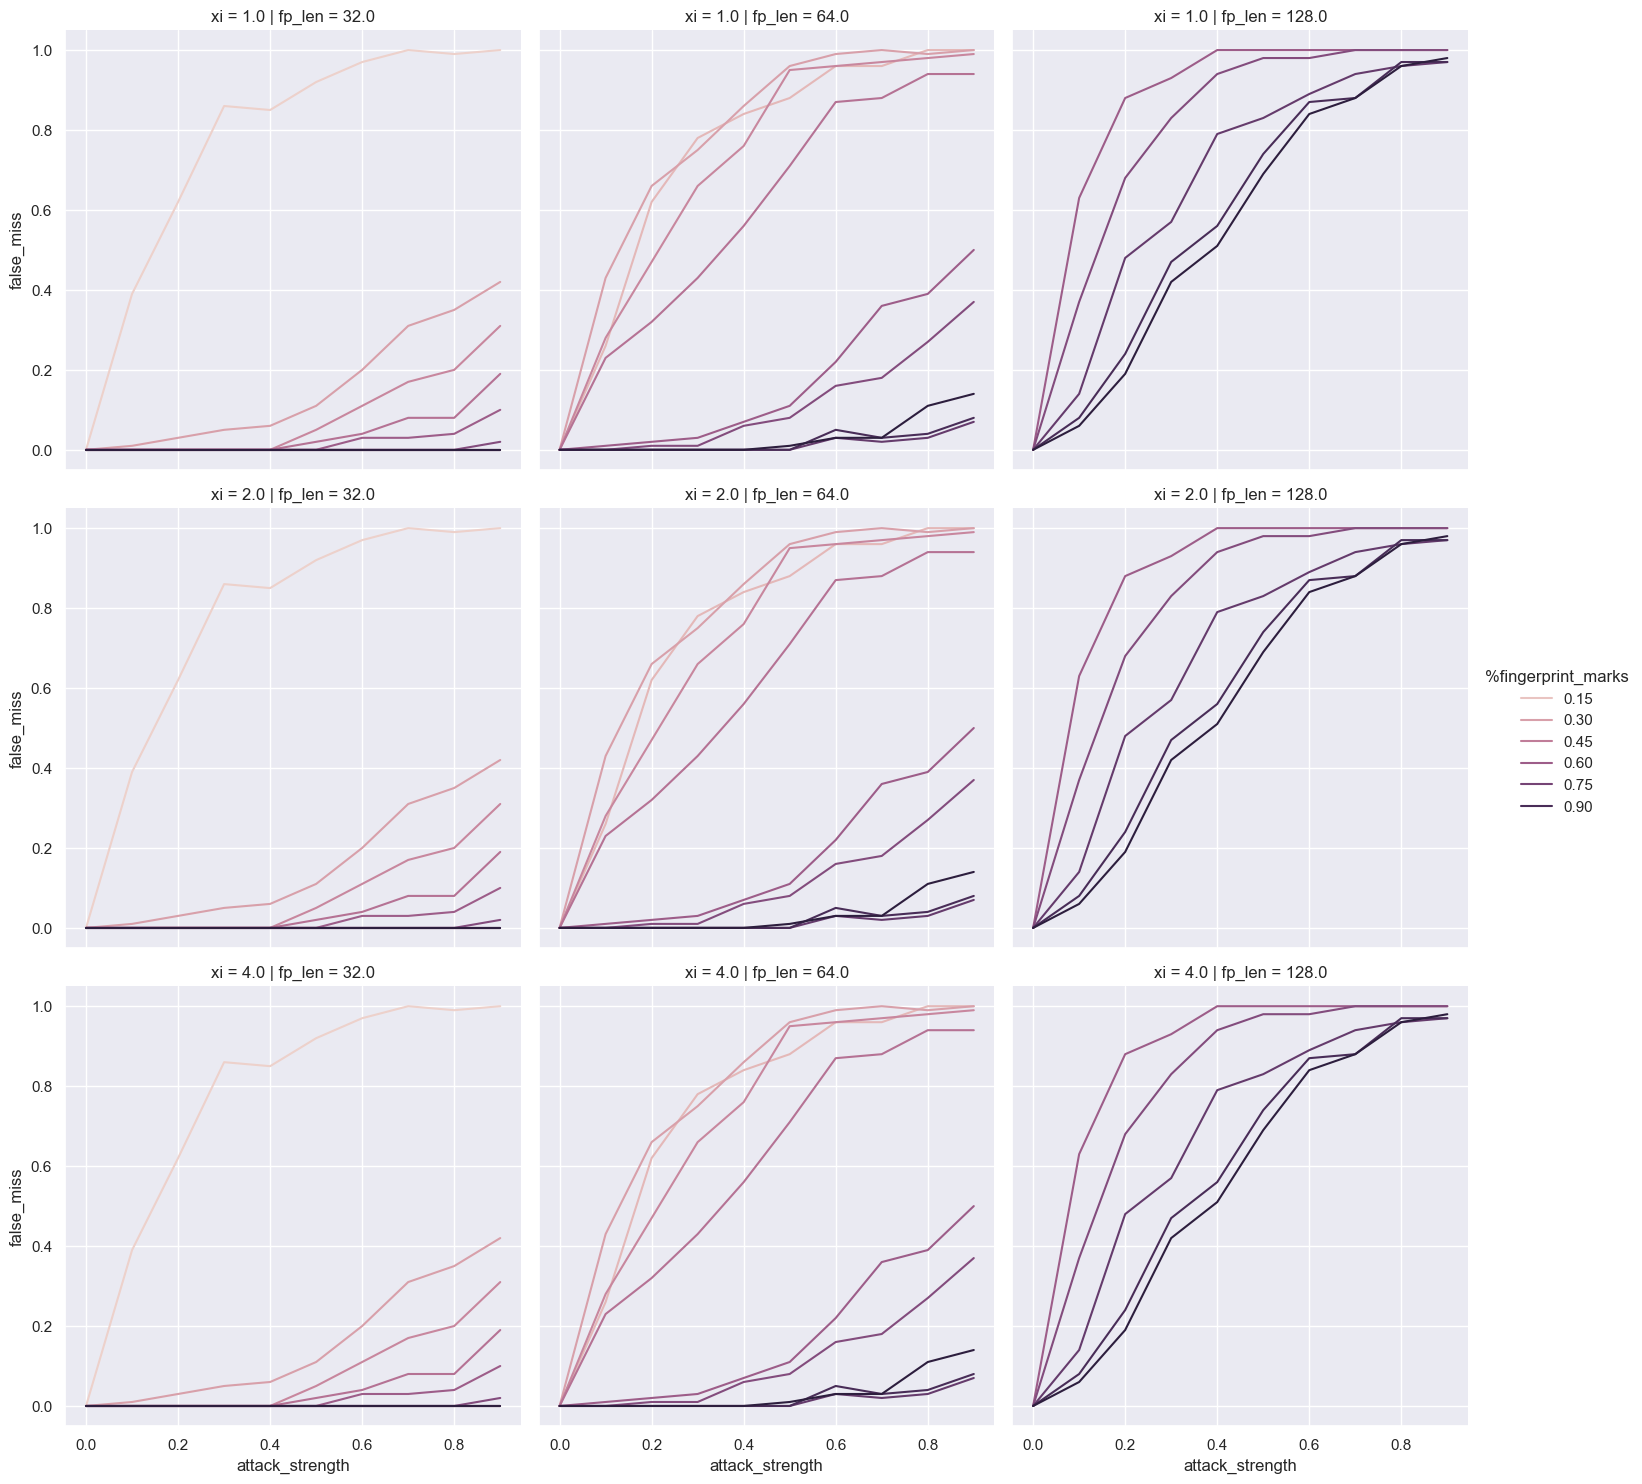

In [22]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_rounding_german_credit.svg')
plt.savefig('figures/robustness_rounding_german_credit.png')

## Superset

In [46]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


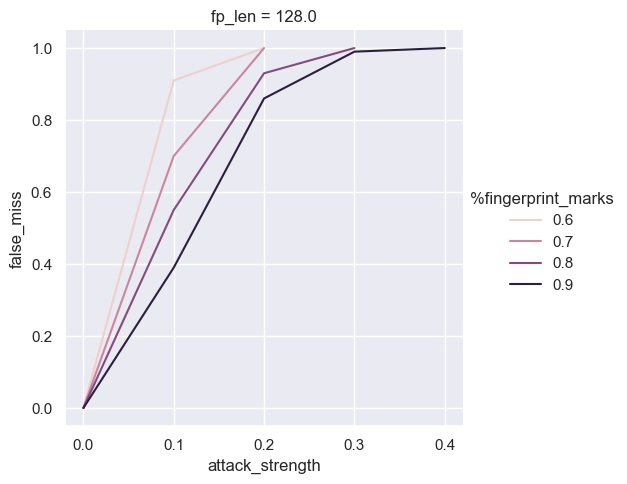

In [47]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_superset_german_credit.svg')
plt.savefig('figures/robustness_superset_german_credit.png')

## Combination attack
Superset attack (horizontal subset + synthetic imputation) + flipping attack

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/german_credit')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/german_credit/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [ ]:
    sns.relplot(data=results_frame, kind='line',
               x='attack_strength', y='false_miss', hue='%fingerprint_marks',
               col='fp_len', row='xi')
    plt.savefig('figures/robustness_combination_german_credit.svg')
    plt.savefig('figures/robustness_combination_german_credit.png')